# Project 2：NASA Data Acquisation, Visualization, and Analysis

In [2]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the NASA API and Data Collection

- Register for a NASA API key and understand the different types of data that the API provides.
- Run the Python script below to fetch data about **Near Earth Objects (NEOs)** from the NASA API for a years data.
- Extract and understand the different pieces of data provided for each NEO.

In [3]:
import requests
import time
from datetime import datetime, timedelta
from getpass import getpass

# Set your NASA API KEY, this step asks you to enter your API KEY.
# (The input box may be float in the top on your editor.)
api_key = getpass()

 ········


In [4]:
# Set the start and end dates for the data you want to fetch
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = start_date + timedelta(days=365)  # 1 year later

# Initialize a list to store the data
data = []

# Fetch data from the NASA API 7 days at a time
# The introduction of the API is on https://api.nasa.gov, under "Browse APIs" -> "Asteroids NeoWs"
# You can look into the example query in the link below to see what the data look like:
# https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=DEMO_KEY
current_date = start_date
while current_date < end_date:
    next_date = min(current_date + timedelta(days=7), end_date)
    response = requests.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}')
    data.append(response.json())
    current_date = next_date
    time.sleep(1)  # To avoid hitting the rate limit

# Now 'data' contains the NEO data for the 1-year period


In [16]:
# Check the date coverage of your data.
dates_contained_in_data = []
for d in data:
    dates_contained_in_data += list(d['near_earth_objects'].keys())

print(sorted(dates_contained_in_data))

['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022

In [6]:
from src.utils import get_a_random_chunk_property

In [7]:
get_a_random_chunk_property(data)

date: 2022-09-07
NEO name: (2016 RX17)
is_potentially_hazardous_asteroid: False


For the remaining tasks, you have to organize the data as pd.DataFrame so as to suit the specific need in each task. This part may require a considerably amount of efforts, which is normal in data science and analytics works.

### Task 2: Data Analysis

- Calculate the average size of the NEOs for each day.
- Determine the proportion of NEOs that are potentially hazardous.
- Find the NEO with the closest approach distance for each day.
- Use statistical methods to analyze the data. For example, calculate the mean, median, mode, and standard deviation of the NEO sizes. Determine if the size of a NEO is correlated with whether it is potentially hazardous.

In [12]:
import pandas as pd
import json

# Read the JSON data from the file
with open('data.json') as file:
    json_data = json.load(file)

# Create an empty list to store the flattened data
flattened_data = []

# Iterate over each entry in json_data
for entry in json_data:
    # Extract the "near_earth_objects" dictionary from the entry
    near_earth_objects = entry["near_earth_objects"]

    # Iterate over the near_earth_objects and flatten the data
    for date, objects in near_earth_objects.items():
        for obj in objects:
            # Extract the "close_approach_data" for each object
            close_approach_data = obj["close_approach_data"]

            # Remove the "close_approach_data" from the object
            del obj["close_approach_data"]

            # Add the "close_approach_date" to each close_approach_data entry
            for close_approach in close_approach_data:
                close_approach["close_approach_date"] = date

                # Unpack the "miss_distance" field
                miss_distance = close_approach.pop("miss_distance")
                for key, value in miss_distance.items():
                    close_approach[f"miss_distance_{key}"] = value

                # Unpack the "relative_velocity" field
                relative_velocity = close_approach.pop("relative_velocity")
                for key, value in relative_velocity.items():
                    close_approach[f"relative_velocity_{key}"] = value

                # Unpack the "estimated_diameter" field
                estimated_diameter = obj.pop("estimated_diameter")
                for metric, values in estimated_diameter.items():
                    for key, value in values.items():
                        obj[f"estimated_diameter_{metric}_{key}"] = value

                flattened_data.append({**obj, **close_approach})

# Convert the flattened data into a dataframe
df = pd.DataFrame(flattened_data)

# Print the dataframe
df





,links,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,estimated_diameter_kilometers_estimated_diameter_min,estimated_diameter_kilometers_estimated_diameter_max,...,close_approach_date_full,epoch_date_close_approach,orbiting_body,miss_distance_astronomical,miss_distance_lunar,miss_distance_kilometers,miss_distance_miles,relative_velocity_kilometers_per_second,relative_velocity_kilometers_per_hour,relative_velocity_miles_per_hour
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2216523,2216523,216523 (2001 HY7),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2216523,20.70,True,False,0.192555,0.430566,...,2022-Jan-07 06:54,1641538440000,Earth,0.3880911603,150.9674613567,58057610.946708561,36075326.6071617018,13.0121880947,46843.877140861,29106.9635489977
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2494697,2494697,494697 (2004 SW55),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2494697,20.77,True,False,0.186447,0.416908,...,2022-Jan-07 12:09,1641557340000,Earth,0.1338706569,52.0756855341,20026765.127740803,12444054.8118889614,10.0477997303,36172.079029246,22475.9232168112
2,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2496860,2496860,496860 (1999 XL136),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2496860,19.68,True,False,0.308003,0.688716,...,2022-Jan-07 02:07,1641521220000,Earth,0.089547274,34.833889586,13396081.45470638,8323939.029772844,16.7624359332,60344.7693594415,37495.8929389263
3,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3311963,3311963,(2006 AL4),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3311963,24.92,False,False,0.027578,0.061665,...,2022-Jan-07 14:45,1641566700000,Earth,0.095183198,37.026264022,14239203.68058826,8847830.887747588,9.4579600698,34048.6562512758,21156.510880133
4,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3401388,3401388,(2008 CO),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3401388,22.60,False,False,0.080270,0.179490,...,2022-Jan-07 07:54,1641542040000,Earth,0.2067861693,80.4398198577,30934770.472739391,19221975.0369339558,4.4645655825,16072.4360970133,9986.7867515025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7946,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54338714,54338714,(2023 AW),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54338714,25.74,False,False,0.018904,0.042271,...,2022-Dec-31 06:37,1672468620000,Earth,0.0099250728,3.8608533192,1484769.750474936,922593.1417326768,8.356339796,30082.8232655847,18692.2964896629
7947,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54339156,54339156,(2023 AC2),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54339156,24.41,False,False,0.034878,0.077990,...,2022-Dec-31 23:25,1672529100000,Earth,0.0109668251,4.2660949639,1640613.675622537,1019430.0664315306,9.9953894116,35983.4018816369,22358.6865747315
7948,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54339184,54339184,(2023 BE),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54339184,24.40,False,False,0.035039,0.078350,...,2022-Dec-31 16:28,1672504080000,Earth,0.1344734221,52.3101611969,20116937.517770927,12500085.3368837126,6.1359851643,22089.5465915871,13725.5852140892
7949,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54339974,54339974,(2023 BJ2),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54339974,24.04,False,False,0.041358,0.092478,...,2022-Dec-31 15:05,1672499100000,Earth,0.0424701269,16.5208793641,6353440.522869703,3947844.8769117814,10.0717027127,36258.129765626,22529.3917979802


In [14]:
#Finds average diameter pr. day:
# Convert the date column to datetime type
df['close_approach_date'] = pd.to_datetime(df['close_approach_date'])

# Define the list of keys for diameter columns
diameter_keys = ['estimated_diameter_kilometers_estimated_diameter_min', 'estimated_diameter_kilometers_estimated_diameter_max']

# Extract the required columns and convert them to numeric type
df[diameter_keys] = df[diameter_keys].apply(pd.to_numeric)

# Group by date and calculate the average diameter for each day
average_diameter = df.groupby('close_approach_date')[diameter_keys].mean()

average_diameter

,estimated_diameter_kilometers_estimated_diameter_min,estimated_diameter_kilometers_estimated_diameter_max
close_approach_date,,
2022-01-01,0.101401,0.226738
2022-01-02,0.070013,0.156554
2022-01-03,0.017416,0.038942
2022-01-04,0.049554,0.110805
2022-01-05,0.109484,0.244814
...,...,...
2022-12-28,0.077546,0.173399
2022-12-29,0.116757,0.261076
2022-12-30,0.084969,0.189996


In [15]:
# Calculate the proportions of potentially hazardous near_earth_objects
proportions = df['is_potentially_hazardous_asteroid'].value_counts(normalize=True)

print("Proportion hazardours: \n", proportions)

Proportion hazardours: 
 False    0.936234
True     0.063766
Name: is_potentially_hazardous_asteroid, dtype: float64


In [20]:
#NEO with closest approach pr. day: 
df['miss_distance_kilometers']=pd.to_numeric(df['miss_distance_kilometers'])
df.loc[df.groupby('close_approach_date')['miss_distance_kilometers'].idxmin()]


,links,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,estimated_diameter_kilometers_estimated_diameter_min,estimated_diameter_kilometers_estimated_diameter_max,...,close_approach_date_full,epoch_date_close_approach,orbiting_body,miss_distance_astronomical,miss_distance_lunar,miss_distance_kilometers,miss_distance_miles,relative_velocity_kilometers_per_second,relative_velocity_kilometers_per_hour,relative_velocity_miles_per_hour
104,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54235477,54235477,(2022 AJ1),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54235477,27.86,False,False,0.007121,0.015924,...,2022-Jan-01 09:01,1641027660000,Earth,0.0051506713,2.0036111357,7.705295e+05,478784.8021325678,11.160213972,40176.7702992313,24964.2826339863
122,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54235525,54235525,(2022 AP1),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54235525,28.39,False,False,0.005579,0.012475,...,2022-Jan-02 16:56,1641142560000,Earth,0.0012072168,0.4696073352,1.805971e+05,112217.8106607408,10.640214595,38304.772541869,23801.0960274741
38,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54235463,54235463,(2022 AU),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54235463,29.13,False,False,0.003968,0.008872,...,2022-Jan-03 03:05,1641179100000,Earth,0.0021291606,0.8282434734,3.185179e+05,197917.8396764436,7.2292378449,26025.2562417962,16171.0821353539
51,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54235528,54235528,(2022 AT1),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54235528,26.22,False,False,0.015155,0.033888,...,2022-Jan-04 22:53,1641336780000,Earth,0.0136449706,5.3078935634,2.041259e+06,1268379.2399693036,12.8183926829,46146.2136583014,28673.4625922929
67,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54243529,54243529,(2022 AV13),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54243529,31.82,False,False,0.001150,0.002571,...,2022-Jan-05 06:41,1641364860000,Earth,0.0007318304,0.2846820256,1.094803e+05,68027.8846873024,7.532046341,27115.3668275945,16848.4344601795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54337704,54337704,(2023 AB),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54337704,25.00,False,False,0.026580,0.059435,...,2022-Dec-28 16:49,1672246140000,Earth,0.0173834831,6.7621749259,2.600532e+06,1615895.6826478786,10.3146810415,37132.8517495588,23072.91002183
7863,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54337572,54337572,(2022 YT6),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54337572,26.15,False,False,0.015651,0.034998,...,2022-Dec-29 18:46,1672339560000,Earth,0.0152559938,5.9345815882,2.282264e+06,1418133.2000100028,13.779372627,49605.7414572925,30823.0786293938
7891,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54336904,54336904,(2022 YG5),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54336904,26.73,False,False,0.011983,0.026794,...,2022-Dec-30 07:02,1672383720000,Earth,0.0208725239,8.1194117971,3.122485e+06,1940222.2823787634,14.2349067614,51245.6643410112,31842.0629345578
7881,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54338714,54338714,(2023 AW),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54338714,25.74,False,False,0.018904,0.042271,...,2022-Dec-31 06:37,1672468620000,Earth,0.0099250728,3.8608533192,1.484770e+06,922593.1417326768,8.356339796,30082.8232655847,18692.2964896629


In [23]:
#Statistical analysis:
# Convert the date column to datetime type

# Convert 'estimated_diameter.kilometers.estimated_diameter_max' to numeric type
df['estimated_diameter_kilometers_estimated_diameter_max'] = pd.to_numeric(df['estimated_diameter_kilometers_estimated_diameter_max'])

# Calculate the mean, median, mode, and standard deviation
mean = df['estimated_diameter_kilometers_estimated_diameter_max'].mean()
median = df['estimated_diameter_kilometers_estimated_diameter_max'].median()
mode = df['estimated_diameter_kilometers_estimated_diameter_max'].mode()
std_dev = df['estimated_diameter_kilometers_estimated_diameter_max'].std()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard Deviation: ", std_dev)

# Calculate the correlation coefficient
correlation = df['estimated_diameter_kilometers_estimated_diameter_max'].corr(df['is_potentially_hazardous_asteroid'])

print("Correlation Coefficient: ", correlation)

Mean:  0.20791612723515276
Median:  0.0765667087
Mode:  0    0.047211
Name: estimated_diameter_kilometers_estimated_diameter_max, dtype: float64
Standard Deviation:  0.4082616596227345
Correlation Coefficient:  0.2567859111051915


### Task 3: Data Visualization Part A

- Create a line plot of the number of NEOs per week.
- Create a histogram of the distribution of NEO sizes.
- Create a bar plot of the average NEO size per week.
- Use a library like Seaborn to create more complex visualizations, such as a box plot of the NEO sizes or a heat map of the number of NEOs per week. **Be creative**!

In [24]:
# Write your code
#Converts to datetime:
df['close_approach_date'] = pd.to_datetime(df['close_approach_date'])

#Finds weeknumber:
df['week_number'] = df['close_approach_date'].dt.week

df_num_neo = df.groupby('week_number').size().reset_index(name='Number of NEOs')

C:\Users\hasse\AppData\Local\Temp\ipykernel_21732\2290474092.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_number'] = df['close_approach_date'].dt.week


<function matplotlib.pyplot.show(close=None, block=None)>

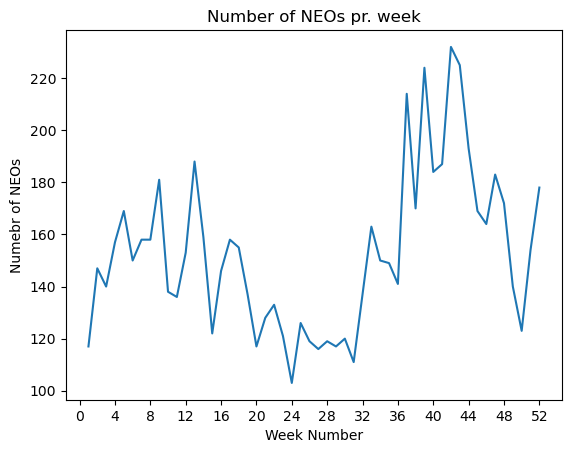

In [25]:
#Task 1: Create a line plot of the number of NEOs per week:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Create plot:
ax_Line = sns.lineplot(data=df_num_neo, x = "week_number", y = 'Number of NEOs')
#Set labels:
ax_Line.set(xlabel = "Week Number",
            ylabel = 'Numebr of NEOs', 
            title = "Number of NEOs pr. week")
#Set x-axis interval:
ax_Line.xaxis.set_major_locator(ticker.MultipleLocator(4))
#Show graph: 
plt.show

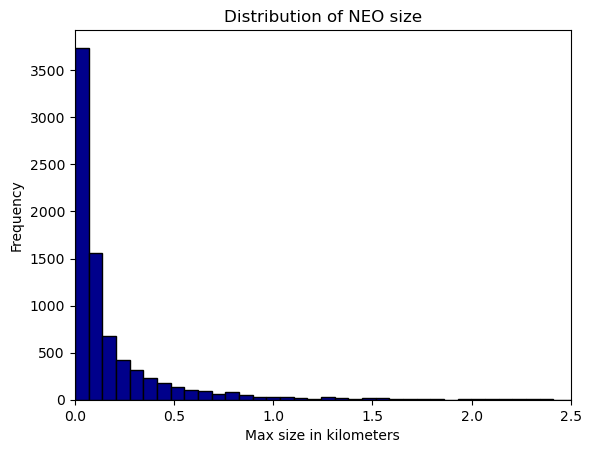

In [34]:
#Task 2: Create a histogram of the distribution of NEO sizes:
from src.histogram import plot_histogram

plot_histogram(df['estimated_diameter_kilometers_estimated_diameter_max'], 
               bins = 100, title = "Distribution of NEO size", 
               xmin = 0,
               xmax = 2.5, 
               xlabel = 'Max size in kilometers')

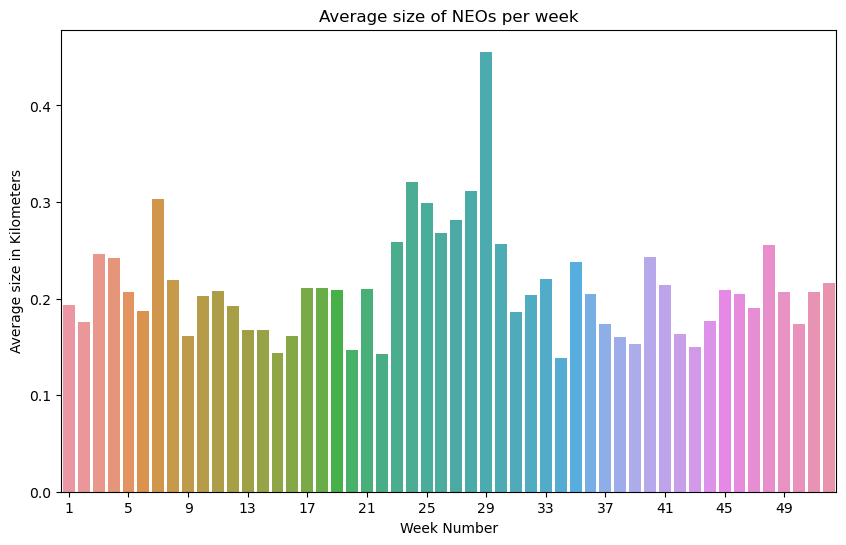

In [36]:
#Task 3: Create a barplot of the average NEO size per week
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#Finds the average size per week in meters: 
Avg_size_week = df.groupby(
                           'week_number'
                           )[
                               'estimated_diameter_kilometers_estimated_diameter_max'
                               ].mean().reset_index(name = "Average size")

#Sets the figure:
plt.figure(figsize=(10, 6))

#Create the bar plot using seaborn
Ax_bar_plot = sns.barplot(x='week_number', y='Average size', data=Avg_size_week)
Ax_bar_plot.set(xlabel = 'Week Number',
                ylabel = 'Average size in Kilometers', 
                title = 'Average size of NEOs per week')
#Sets the x-axis interval length:
Ax_bar_plot.xaxis.set_major_locator(ticker.MultipleLocator(4))
#Show the plot
plt.show()


### Task 4: Data Visualization Part B

- Create a pie chart of the proportion of hazardous vs non-hazardous NEOs.
- Create a scatter plot of the correlation between NEO size and close approach distance.
- Customize the appearance of your plots (e.g., colors, labels, titles).
- Create interactive visualizations using a library like Plotly. For example, create an interactive scatter plot where you can hover over each point to see more information about the NEO. **Be creative!**

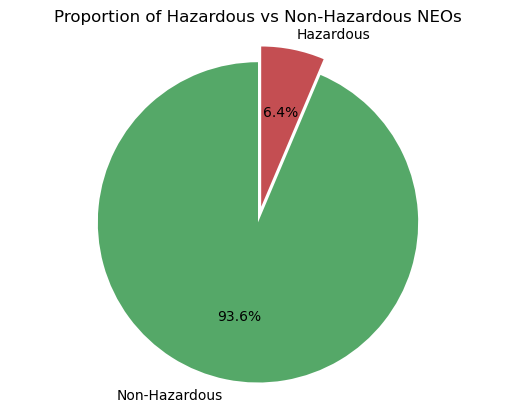

In [37]:
# Write your code
# Create a pie chart of the proportions
labels = ['Non-Hazardous', 'Hazardous']
colors = ['#55a868', '#c44e52']
explode = [0, 0.1]  # Explode the second slice (Hazardous)

plt.pie(proportions, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.title('Proportion of Hazardous vs Non-Hazardous NEOs')

plt.show()

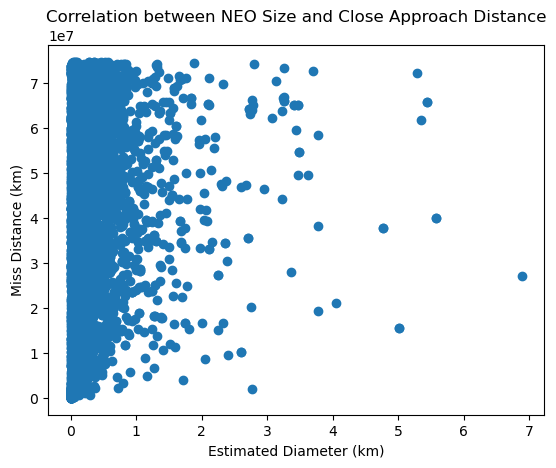

In [41]:
# Task 2: Create scatter plot

import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df['estimated_diameter_kilometers_estimated_diameter_max'], df['miss_distance_kilometers'])

# Set plot labels and title
plt.xlabel('Estimated Diameter (km)')
plt.ylabel('Miss Distance (km)')
plt.title('Correlation between NEO Size and Close Approach Distance')

# Display the plot
plt.show()


In [49]:
#Task 4: Interactive scatter plot
import pandas as pd
import plotly.express as px

# Filter the data based on the condition
filtered_df = df[df['is_potentially_hazardous_asteroid'] == True]

# Create an interactive scatter plot with Plotly
fig = px.scatter(filtered_df, x='estimated_diameter_kilometers_estimated_diameter_max', y='miss_distance_kilometers',
                 title='Diameter and miss distance for Hazardous NEOs', 
                 hover_data=['close_approach_date', 'id', 'absolute_magnitude_h'])

# Set axis labels
fig.update_xaxes(title='Estimated Diameter (km)')
fig.update_yaxes(title='Miss Distance (km)')

# Show the plot
fig.show()


In [51]:
import plotly.express as px
import pandas as pd

# Assuming you have a DataFrame called 'df' with columns 'estimated_diameter_kilometers_estimated_diameter_max' and 'close_approach_date'

# Extract the month from the 'close_approach_date' column
#df['month'] = pd.to_datetime(df['close_approach_date']).dt.month

# Create the box plot using Plotly Express
fig = px.box(df, x=pd.to_datetime(df['close_approach_date']).dt.month, y='estimated_diameter_kilometers_estimated_diameter_max', 
             labels={'x': 'Month', 'estimated_diameter_kilometers_estimated_diameter_max': 'Estimated Diameter (km)'})

# Set the title of the plot
fig.update_layout(title='Box Plot of Estimated Diameter per Month')

# Show the plot
fig.show()


In [55]:
import plotly.graph_objects as go
import pandas as pd

# Group the data by month and get the estimated diameter values
df['relative_velocity_kilometers_per_second'] = pd.to_numeric(df['relative_velocity_kilometers_per_second'])
grouped_df = df.groupby(pd.to_datetime(df['close_approach_date']).dt.month)['relative_velocity_kilometers_per_second'].apply(list)

# Create the violin plot using Plotly graph objects
data = []
for month, values in grouped_df.items():
    trace = go.Violin(y=values, name=str(month))
    data.append(trace)

# Set the layout of the plot
layout = go.Layout(
    title='Violin Plot of relative velocity (km/s) per Month',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Relative Velocity (km/s)')
)

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()


### Task 5: Interpretation of Results

- Interpret the results of your data visualization in part A and B. 
- What insights can you gain about NEOs from your results? Summarizing your findings.
- Use your findings to make predictions or recommendations. For example, if you found that larger NEOs are more likely to be potentially hazardous, you could recommend that more resources be allocated to tracking large NEOs. **Be creative!**
- Identify, understand, and explain one scientific paper, on a clustering or classification method of relevance that could help Task 5. You don't have to implement it, you just need to justify in this notebook why the method in the scientific paper could contribute in analysis or interpretation of the results.

In [ ]:
# Write your code

### Task 6: Presentation and Documentation

- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This should include an overview of your work, the results of your data analysis, and the insights you gained from your results.